<a href="https://colab.research.google.com/github/PinkUyu/PinkUyu.github.io/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount('/content/drive')
filepath = '/content/drive/MyDrive/Mine_Dataset.csv'

#read in dataset
mines = pd.read_csv(filepath)

#check correctly imporated and columns labeled
mines.head(5)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,V,H,S,M
0,0.338157,0.000000,0.0,1
1,0.320241,0.181818,0.0,1
2,0.287009,0.272727,0.0,1
3,0.256284,0.454545,0.0,1
4,0.262840,0.545455,0.0,1


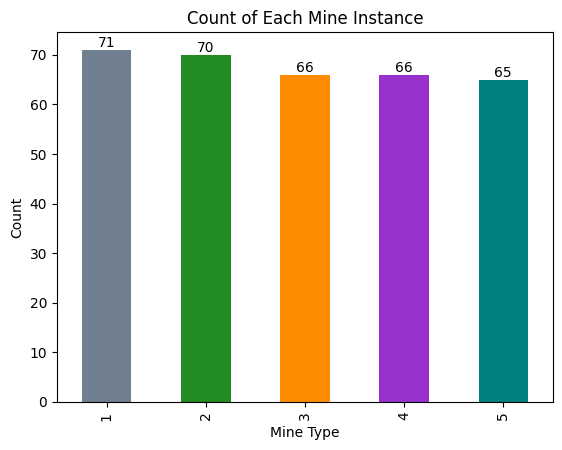

In [ ]:
mine_type_count = mines['M'].value_counts() #store counts of each respective mine

#Create bar plot of each mine type to show balance of dataset
bar_plot = mine_type_count.plot.bar(title="Count of Each Mine Instance", xlabel="Mine Type", ylabel="Count", color=['slategrey', 'forestgreen', 'darkorange', 'darkorchid', 'teal'])
plt.bar_label(bar_plot.containers[0])
plt.show()


In [ ]:
X_data=mines.drop(['M'],axis=1).values #columns except for M
Y_data=mines['M'].values #M column
Y_data = Y_data.reshape(-1,1)

Y_binary_data = (Y_data >= 2).astype(int)

#split data into training and testing
test_size = 0.1
X_train, X_test, Y_train, Y_test, Y_binary_train, Y_binary_test = train_test_split(X_data, Y_data, Y_binary_data, test_size=test_size, random_state=3)
print("shape of X_train:")
print("", X_train.shape)
print("shape of Y_train:")
print("", Y_train.shape)
print("shape of Y_binary_train:")
print("", Y_binary_train.shape)
print()
print("shape of X_test:")
print("", X_test.shape)
print("shape of Y_test:")
print("", Y_test.shape)
print("shape of Y_binary_test:")
print("", Y_binary_test.shape)
print()


shape of X_train:
 (304, 3)
shape of Y_train:
 (304, 1)
shape of Y_binary_train:
 (304, 1)

shape of X_test:
 (34, 3)
shape of Y_test:
 (34, 1)
shape of Y_binary_test:
 (34, 1)



Single Tree
[0.63566074 0.19103588 0.17330337]
0.5588235294117647
0.7988165680473372


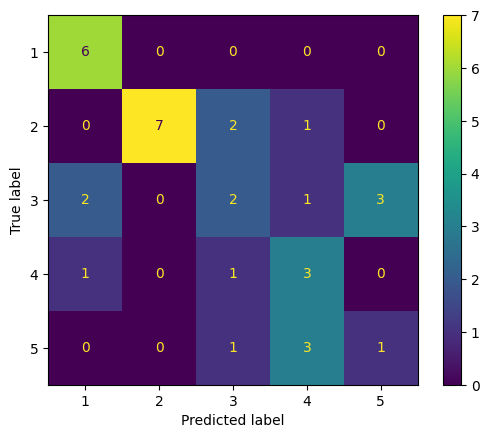


Single Tree Binary
[0.63626995 0.15548827 0.20824178]
0.8823529411764706
0.9763313609467456


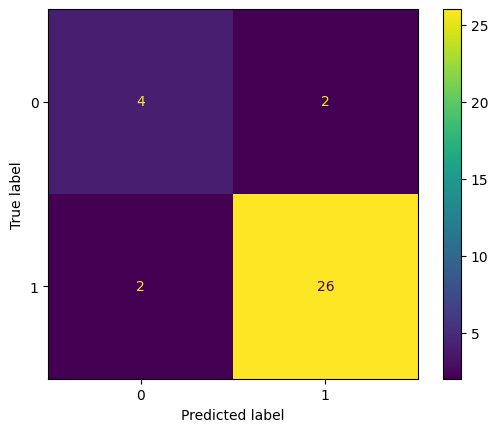


Random Forest
[0.71180497 0.17395779 0.11423724]
0.6176470588235294
0.9349112426035503


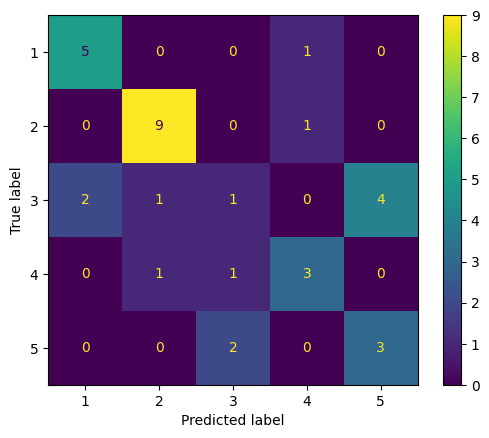


Random Forest Binary
[0.7319534 0.1681539 0.0998927]
0.8823529411764706
0.985207100591716


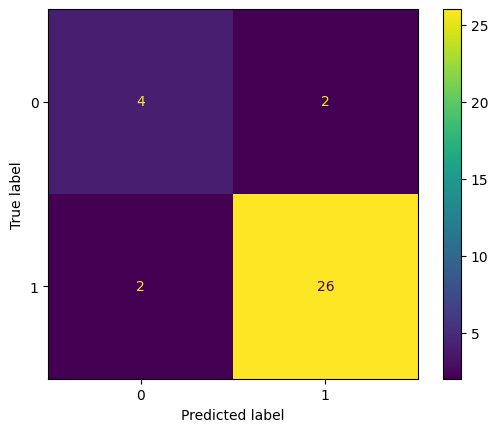


Bagging
0.6176470588235294
0.9289940828402367


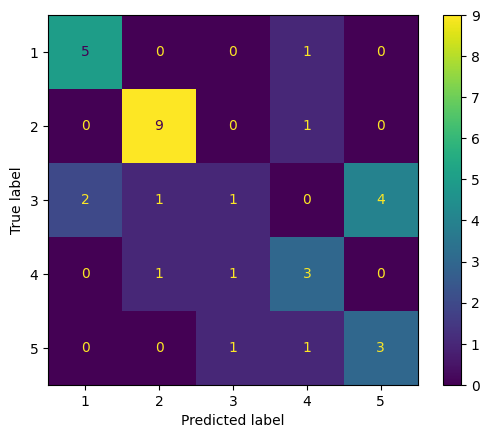


Bagging Binary
0.9117647058823529
0.9792899408284024


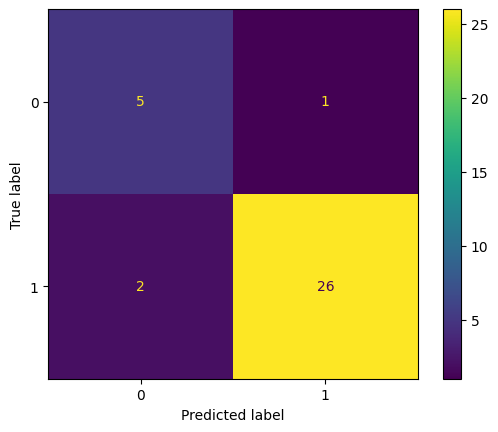


AdaBoost
[0.55405707 0.25619061 0.18975232]
0.5588235294117647
0.9556213017751479


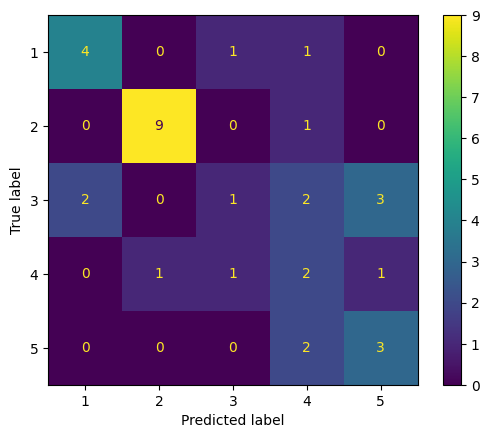


AdaBoost Binary
[0.68059772 0.16765285 0.15174943]
0.8823529411764706
0.9881656804733728


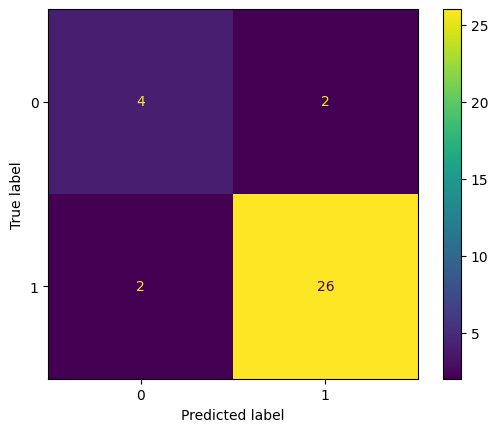


Support Vector
0.47058823529411764
0.5355029585798816


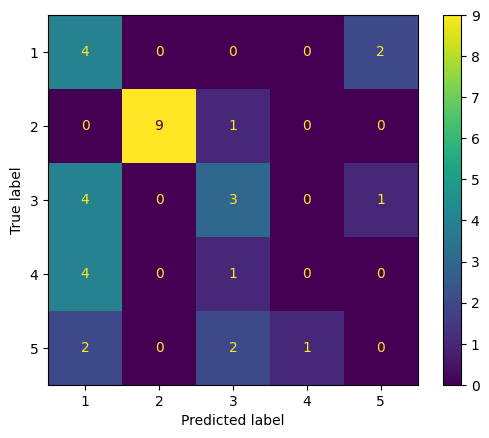


Support Vector Binary
0.8235294117647058
0.7899408284023669


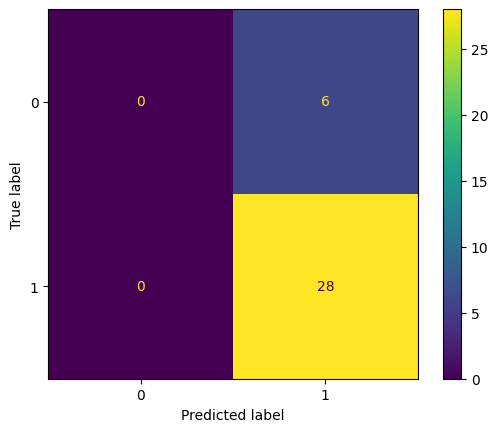


Neural Network
0.5882352941176471
0.5177514792899408


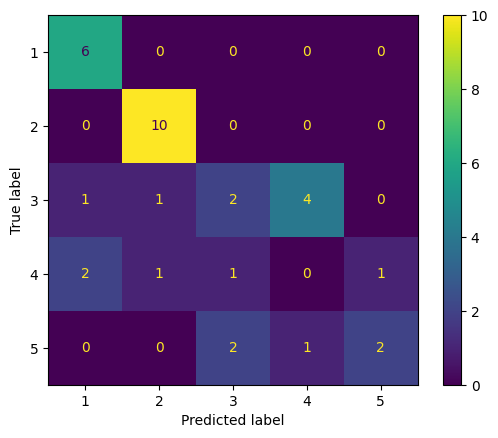


Neural Network Binary
0.8823529411764706
0.863905325443787


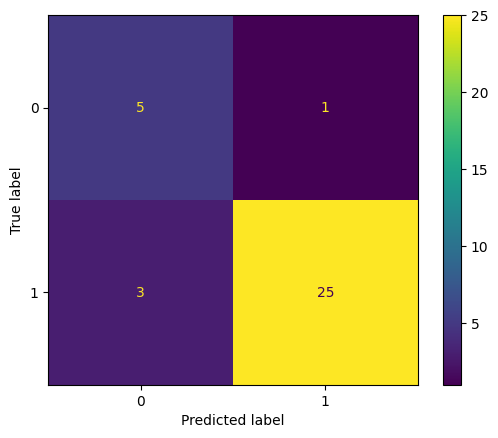


K-Nearest Neighnors
0.4411764705882353
0.9437869822485208


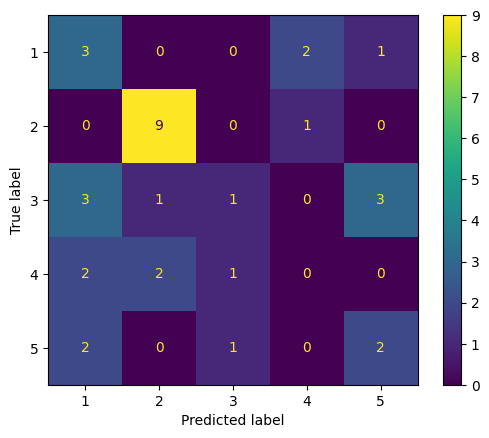


K-Nearest Neighbors Binary
0.7058823529411765
0.9704142011834319


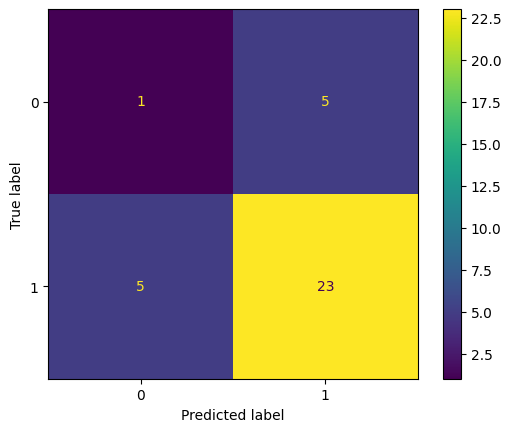


Voting Classifcation of Forest, Bagging, Ada, and KNN
0.6176470588235294
0.9585798816568047


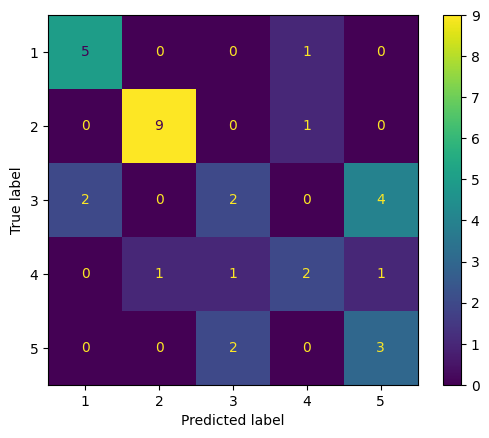

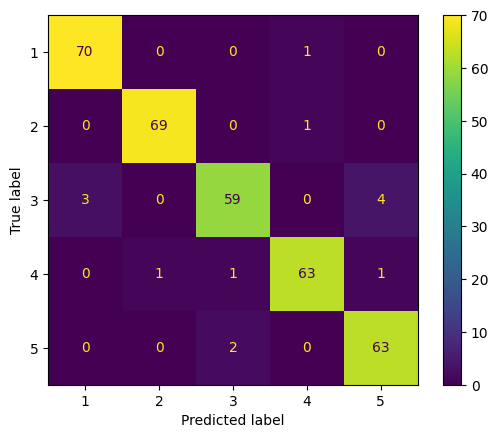


Voting Binary Classifcation of Forest, Bagging, Ada, and KNN
0.9117647058823529
0.9911242603550295


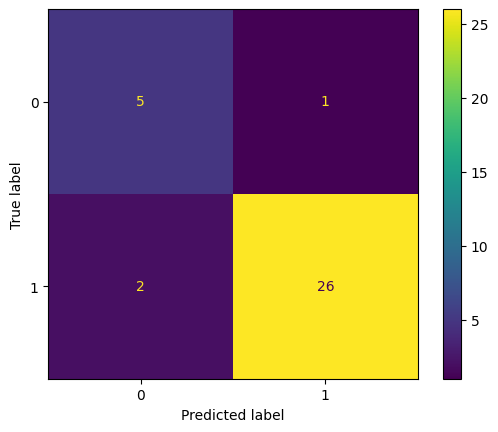

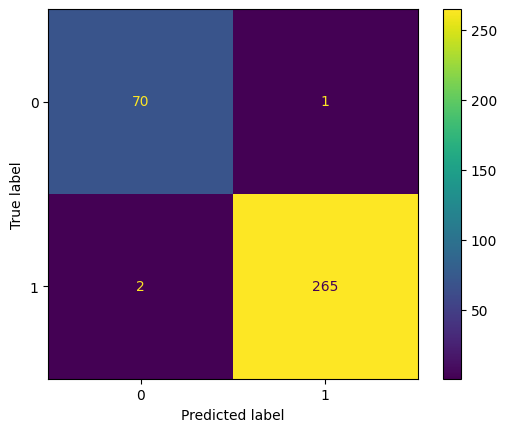

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

max_depth = 8

single_tree = DecisionTreeClassifier(max_depth=max_depth)
single_tree.fit(X_train, Y_train)

Y_pred_single = single_tree.predict(X_test).reshape(-1, 1)

print("Single Tree")
print(single_tree.feature_importances_)
single_acc = accuracy_score(Y_test, Y_pred_single)
single_score = single_tree.score(X_data, Y_data)
print(single_acc)
print(single_score)
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_single)
plt.show()
print()

single_tree.fit(X_train, Y_binary_train)

Y_pred_binary_single = single_tree.predict(X_test).reshape(-1, 1)

print("Single Tree Binary")
print(single_tree.feature_importances_)
single_acc_binary = accuracy_score(Y_binary_test, Y_pred_binary_single)
single_score_binary = single_tree.score(X_data, Y_binary_data)
print(single_acc_binary)
print(single_score_binary)
ConfusionMatrixDisplay.from_predictions(Y_binary_test, Y_pred_binary_single)
plt.show()
print()

random_forest = RandomForestClassifier(max_depth=max_depth)
random_forest.fit(X_train, Y_train.ravel())

Y_pred_forest = random_forest.predict(X_test)

print("Random Forest")
print(random_forest.feature_importances_)
forest_acc = accuracy_score(Y_test, Y_pred_forest)
forest_score = random_forest.score(X_data, Y_data)
print(forest_acc)
print(forest_score)
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_forest)
plt.show()
print()

random_forest.fit(X_train, Y_binary_train.ravel())

Y_pred_binary_forest = random_forest.predict(X_test).reshape(-1, 1)

print("Random Forest Binary")
print(random_forest.feature_importances_)
forest_acc_binary = accuracy_score(Y_binary_test, Y_pred_binary_forest)
forest_score_binary = random_forest.score(X_data, Y_binary_data)
print(forest_acc_binary)
print(forest_score_binary)
ConfusionMatrixDisplay.from_predictions(Y_binary_test, Y_pred_binary_forest)
plt.show()
print()

bagging = BaggingClassifier()
bagging.fit(X_train, Y_train.ravel())

Y_pred_bagging = bagging.predict(X_test)

print("Bagging")
bagging_acc = accuracy_score(Y_test, Y_pred_bagging)
bagging_score = bagging.score(X_data, Y_data)
print(bagging_acc)
print(bagging_score)
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_bagging)
plt.show()
print()

bagging.fit(X_train, Y_binary_train.ravel())

Y_pred_binary_bagging = bagging.predict(X_test).reshape(-1, 1)

print("Bagging Binary")
bagging_acc_binary = accuracy_score(Y_binary_test, Y_pred_binary_bagging)
bagging_score_binary = bagging.score(X_data, Y_binary_data)
print(bagging_acc_binary)
print(bagging_score_binary)
ConfusionMatrixDisplay.from_predictions(Y_binary_test, Y_pred_binary_bagging)
plt.show()
print()

ada = AdaBoostClassifier(estimator=single_tree, learning_rate=1.0)
ada.fit(X_train, Y_train.ravel())

Y_pred_ada = ada.predict(X_test)
print("AdaBoost")
print(ada.feature_importances_)
ada_acc = accuracy_score(Y_test, Y_pred_ada)
ada_score = ada.score(X_data, Y_data)
print(ada_acc)
print(ada_score)
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_ada)
plt.show()
print()

ada.fit(X_train, Y_binary_train.ravel())

Y_pred_binary_ada = ada.predict(X_test).reshape(-1, 1)

print("AdaBoost Binary")
print(ada.feature_importances_)
ada_acc_binary = accuracy_score(Y_binary_test, Y_pred_binary_ada)
ada_score_binary = ada.score(X_data, Y_binary_data)
print(ada_acc_binary)
print(ada_score_binary)
ConfusionMatrixDisplay.from_predictions(Y_binary_test, Y_pred_binary_ada)
plt.show()
print()

svc = SVC()
svc.fit(X_train, Y_train.ravel())

Y_pred_svc = svc.predict(X_test)
print("Support Vector")
svc_acc = accuracy_score(Y_test, Y_pred_svc)
svc_score = svc.score(X_data, Y_data)
print(svc_acc)
print(svc_score)
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_svc)
plt.show()
print()

svc.fit(X_train, Y_binary_train.ravel())

Y_pred_binary_svc = svc.predict(X_test).reshape(-1, 1)

print("Support Vector Binary")
svc_acc_binary = accuracy_score(Y_binary_test, Y_pred_binary_svc)
svc_score_binary = svc.score(X_data, Y_binary_data)
print(svc_acc_binary)
print(svc_score_binary)
ConfusionMatrixDisplay.from_predictions(Y_binary_test, Y_pred_binary_svc)
plt.show()
print()

neural = MLPClassifier(hidden_layer_sizes=(5,5), max_iter=10000)
neural.fit(X_train, Y_train.ravel())

Y_pred_neural = neural.predict(X_test)
print("Neural Network")
neural_acc = accuracy_score(Y_test, Y_pred_neural)
neural_score = neural.score(X_data, Y_data)
print(neural_acc)
print(neural_score)
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_neural)
plt.show()
print()

neural.fit(X_train, Y_binary_train.ravel())

Y_pred_binary_neural = neural.predict(X_test).reshape(-1, 1)

print("Neural Network Binary")
neural_acc_binary = accuracy_score(Y_binary_test, Y_pred_binary_neural)
neural_score_binary = neural.score(X_data, Y_binary_data)
print(neural_acc_binary)
print(neural_score_binary)
ConfusionMatrixDisplay.from_predictions(Y_binary_test, Y_pred_binary_neural)
plt.show()
print()

knn = KNeighborsClassifier(weights='distance')
knn.fit(X_train, Y_train.ravel())

Y_pred_knn = knn.predict(X_test)
print("K-Nearest Neighnors")
knn_acc = accuracy_score(Y_test, Y_pred_knn)
knn_score = knn.score(X_data, Y_data)
print(knn_acc)
print(knn_score)
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_knn)
plt.show()
print()

knn.fit(X_train, Y_binary_train.ravel())

Y_pred_binary_knn = knn.predict(X_test).reshape(-1, 1)

print("K-Nearest Neighbors Binary")
knn_acc_binary = accuracy_score(Y_binary_test, Y_pred_binary_knn)
knn_score_binary = knn.score(X_data, Y_binary_data)
print(knn_acc_binary)
print(knn_score_binary)
ConfusionMatrixDisplay.from_predictions(Y_binary_test, Y_pred_binary_knn)
plt.show()
print()

voting = VotingClassifier(estimators=[('forest', random_forest), ('bagging', bagging), ('ada', ada), ('knn', knn)], voting='hard')
voting.fit(X_train, Y_train.ravel())

Y_pred_voting = voting.predict(X_test)
print("Voting Classifcation of Forest, Bagging, Ada, and KNN")
voting_acc = accuracy_score(Y_test, Y_pred_voting)
voting_score = voting.score(X_data, Y_data)
print(voting_acc)
print(voting_score)
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_voting)
plt.show()

Y_pred_all = voting.predict(X_data)
ConfusionMatrixDisplay.from_predictions(Y_data, Y_pred_all)
plt.show()
print()

voting.fit(X_train, Y_binary_train.ravel())

Y_pred_voting_binary = voting.predict(X_test)
print("Voting Binary Classifcation of Forest, Bagging, Ada, and KNN")
voting_acc_binary = accuracy_score(Y_binary_test, Y_pred_voting_binary)
voting_score_binary = voting.score(X_data, Y_binary_data)
print(voting_acc_binary)
print(voting_score_binary)
ConfusionMatrixDisplay.from_predictions(Y_binary_test, Y_pred_voting_binary)
plt.show()

Y_pred_all_binary = voting.predict(X_data)
ConfusionMatrixDisplay.from_predictions(Y_binary_data, Y_pred_all_binary)
plt.show()
print()


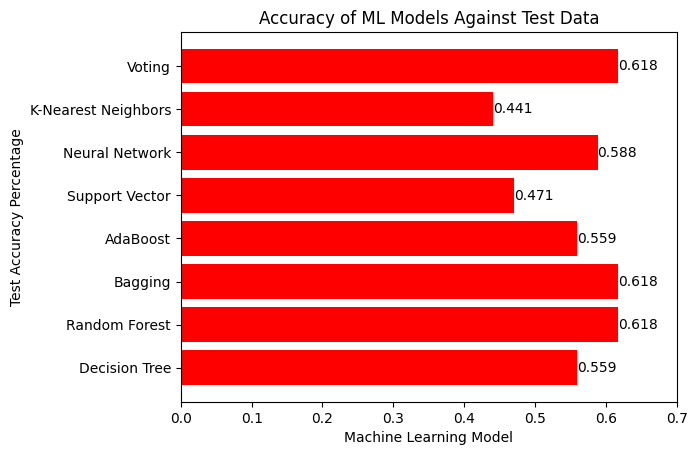

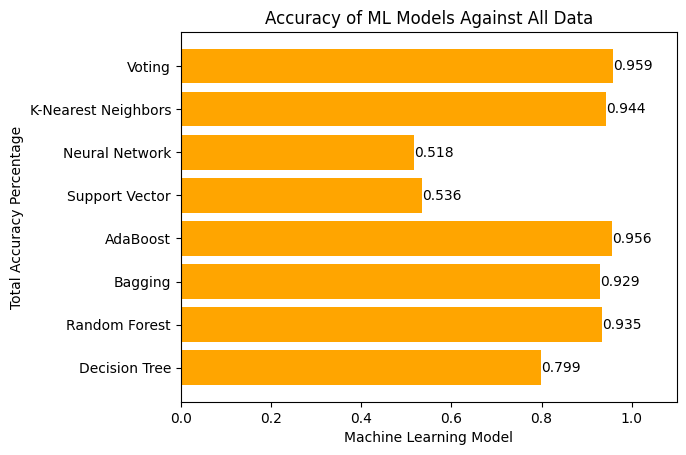

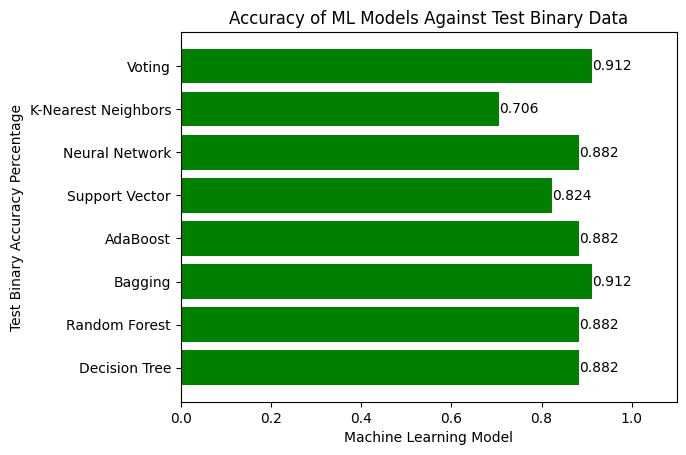

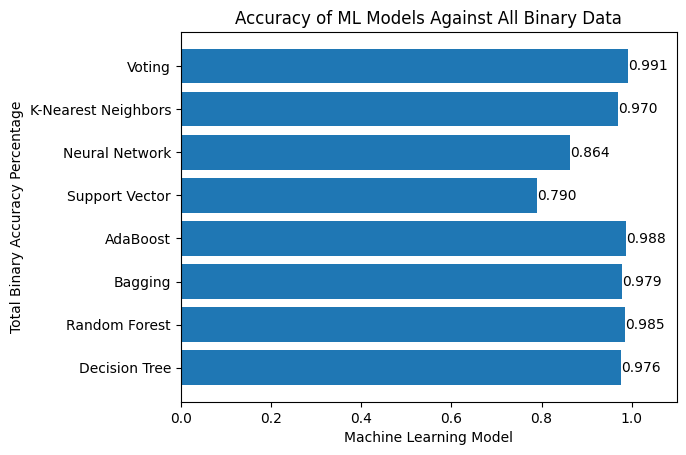

In [ ]:
models = ['Decision Tree', 'Random Forest', 'Bagging', 'AdaBoost', 'Support Vector', 'Neural Network', 'K-Nearest Neighbors', 'Voting']
perc_test = [single_acc, forest_acc, bagging_acc, ada_acc, svc_acc, neural_acc, knn_acc, voting_acc]
perc_all = [single_score, forest_score, bagging_score, ada_score, svc_score, neural_score, knn_score, voting_score]
perc_binary_test = [single_acc_binary, forest_acc_binary, bagging_acc_binary, ada_acc_binary, svc_acc_binary, neural_acc_binary, knn_acc_binary, voting_acc_binary]
perc_binary_all = [single_score_binary, forest_score_binary, bagging_score_binary, ada_score_binary, svc_score_binary, neural_score_binary, knn_score_binary, voting_score_binary]

fig1, ax1 = plt.subplots()

ax1.bar_label(ax1.barh(models, perc_test, color='red'), fmt='%.3f')
ax1.set_ylabel('Test Accuracy Percentage')
ax1.set_xlabel('Machine Learning Model')
ax1.set_xlim(right=0.7)
ax1.set_title('Accuracy of ML Models Against Test Data')
plt.show()
print()

fig2, ax2 = plt.subplots()

ax2.bar_label(ax2.barh(models, perc_all, color='orange'), fmt='%.3f')
ax2.set_ylabel('Total Accuracy Percentage')
ax2.set_xlabel('Machine Learning Model')
ax2.set_xlim(right=1.1)
ax2.set_title('Accuracy of ML Models Against All Data')
plt.show()
print()

fig3, ax3 = plt.subplots()

ax3.bar_label(ax3.barh(models, perc_binary_test, color='green'), fmt='%.3f')
ax3.set_ylabel('Test Binary Accuracy Percentage')
ax3.set_xlabel('Machine Learning Model')
ax3.set_xlim(right=1.1)
ax3.set_title('Accuracy of ML Models Against Test Binary Data')
plt.show()
print()

fig4, ax4 = plt.subplots()

ax4.bar_label(ax4.barh(models, perc_binary_all), fmt='%.3f')
ax4.set_ylabel('Total Binary Accuracy Percentage')
ax4.set_xlabel('Machine Learning Model')
ax4.set_xlim(right=1.1)
ax4.set_title('Accuracy of ML Models Against All Binary Data')
plt.show()
print()